In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import os

col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]

for i in range(1, 33):
    col_names.append(f"Sp{i}")

files = ['StA LD-DD 0118-0201-2024-Copy1.txt']


df = pd.read_csv(files, names=col_names, sep='\s+', header=None)
df = df.set_index('Index')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df = df[df["MonStatus"] == 1]


month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
df['DateM'] = df['DateM'].str[:3].map(month_map)
df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

df.insert(0, 'Day', df['Time'].dt.day.map(day_map))

display(df)

ValueError: Invalid file path or buffer object type: <class 'list'>

In [24]:
#have the dataframes all at once 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

def process_file(file):
    col_names = ["Index", "DateD", "DateM", "DateY", "Time", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused", "Light"]
    
    for i in range(1, 33):
        col_names.append(f"Sp{i}")
    
    df = pd.read_csv(file, names=col_names, sep='\s+', header=None)
    df = df.set_index('Index')
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
    df = df[df["MonStatus"] == 1]

    month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6}
    df['DateM'] = df['DateM'].str[:3].map(month_map)
    df['DateY'] = df['DateY'].apply(lambda x: int(str(20) + str(x)))
    df['Date'] = pd.to_datetime(dict(year=df['DateY'], month=df['DateM'], day=df['DateD']), errors='coerce')

    df['Time'] = pd.to_datetime(dict(year=df['Date'].dt.year,
                                     month=df['Date'].dt.month,
                                     day=df['Date'].dt.day,
                                     hour=df['Time'].dt.hour,
                                     minute=df['Time'].dt.minute,
                                     second=df['Time'].dt.second))

    df = df.drop(["DateD", "DateM", "DateY", "Date", "MonStatus", "Extras", "MonN", "TubeN", "DataType", "Unused"], axis=1)

    day_map = {day: idx+1 for idx, day in enumerate(df['Time'].dt.day.unique())}

    df.insert(0, 'Day', df['Time'].dt.day.map(day_map))
    
    return df

def process_files(files):
    dataframes = {}
    for idx, file in enumerate(files, start=1):
        df = process_file(file)
        dataframes[f'df{idx}'] = df
    return dataframes

files = ['StA LD-DD 0118-0201-2024-Copy1.txt']

dataframes = process_files(files)
for name, df in dataframes.items():
    print(f"{name}:")
    display(df)


df1:


,Day,Time,Light,Sp1,Sp2,Sp3,Sp4,Sp5,Sp6,Sp7,...,Sp23,Sp24,Sp25,Sp26,Sp27,Sp28,Sp29,Sp30,Sp31,Sp32
Index,,,,,,,,,,,,,,,,,,,,,
1,1,2024-01-18 13:17:00,1,2,2,15,9,12,10,17,...,6,6,4,0,0,0,0,0,0,0
2,1,2024-01-18 13:18:00,1,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1,2024-01-18 13:19:00,1,0,0,0,0,1,0,2,...,3,0,20,0,0,0,0,0,0,0
4,1,2024-01-18 13:20:00,1,0,0,0,4,3,0,1,...,0,0,9,0,0,0,0,0,0,0
5,1,2024-01-18 13:21:00,1,0,0,0,3,3,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,15,2024-02-01 17:33:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20418,15,2024-02-01 17:34:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20419,15,2024-02-01 17:35:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df2 = dataframes['df1']
df3 = df2.drop(df2[(df2['Day'] < 2) | (df2['Day'] > 6)].index)

days = df3.groupby('Time').mean()
days = days.drop(['Day', 'Light'], axis=1)
mean_days = days.mean(axis=1)
mean_days
mean_days.plot(mean_days)

Time
2024-01-19 00:00:00    0.18750
2024-01-19 00:01:00    0.00000
2024-01-19 00:02:00    0.12500
2024-01-19 00:03:00    0.00000
2024-01-19 00:04:00    0.31250
                        ...   
2024-01-23 23:55:00    0.53125
2024-01-23 23:56:00    0.03125
2024-01-23 23:57:00    0.00000
2024-01-23 23:58:00    0.00000
2024-01-23 23:59:00    0.00000
Length: 7200, dtype: float64

In [82]:
mean_days.plot(mean_days)

TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind=Time
2024-01-19 00:00:00    0.18750
2024-01-19 00:01:00    0.00000
2024-01-19 00:02:00    0.12500
2024-01-19 00:03:00    0.00000
2024-01-19 00:04:00    0.31250
                        ...   
2024-01-23 23:55:00    0.53125
2024-01-23 23:56:00    0.03125
2024-01-23 23:57:00    0.00000
2024-01-23 23:58:00    0.00000
2024-01-23 23:59:00    0.00000
Length: 7200, dtype: float64)` instead of `Series.plot(Time
2024-01-19 00:00:00    0.18750
2024-01-19 00:01:00    0.00000
2024-01-19 00:02:00    0.12500
2024-01-19 00:03:00    0.00000
2024-01-19 00:04:00    0.31250
                        ...   
2024-01-23 23:55:00    0.53125
2024-01-23 23:56:00    0.03125
2024-01-23 23:57:00    0.00000
2024-01-23 23:58:00    0.00000
2024-01-23 23:59:00    0.00000
Length: 7200, dtype: float64,)`.

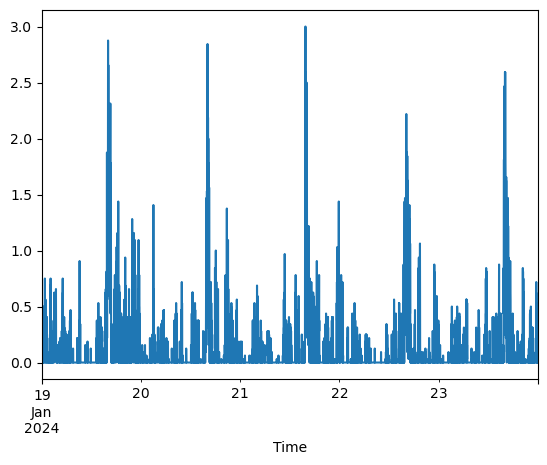

In [84]:
import pandas as pd

# Assuming dataframes is a dictionary containing your DataFrame
# Initialize DataFrame df2
df2 = dataframes['df1']

# Drop rows where 'Day' column value is less than 2 or greater than 6
df3 = df2.drop(df2[(df2['Day'] < 2) | (df2['Day'] > 6)].index)

# Group by 'Time' and calculate mean
days = df3.groupby('Time').mean()

# Drop 'Day' and 'Light' columns
days = days.drop(['Day', 'Light'], axis=1)

# Calculate mean across rows
mean_days = days.mean(axis=1)

# Plot mean_days
mean_days.plot()

# Display the plot
plt.show()
